Распределение Парето $P(k, x_m)$, где $x_m$ это коэффициент маштаба и $k$, задается функцией распределения $F_X(x) = P(X < x) = 1 - (\frac{x_m}{x})^k, \forall
x \geqslant	x_m $ <br>
По умолчанию в SciPy $x_m = 1$<br>
Математическое ожидание: $\frac{kx_m}{k - 1}$, при $k > 1$  <br>
Дисперсия: $(\frac{x_m}{k-1})^2\frac{k}{k-2}$, при $k > 2$  <br>

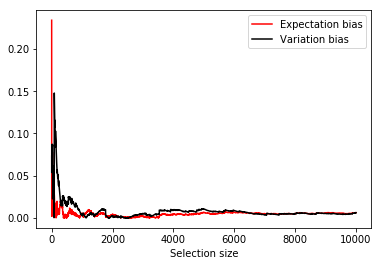

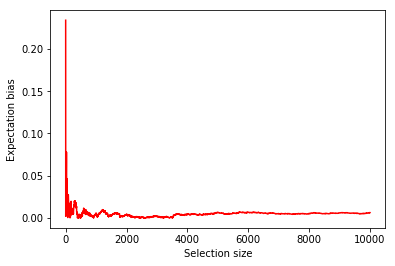

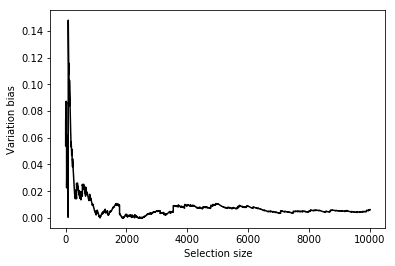

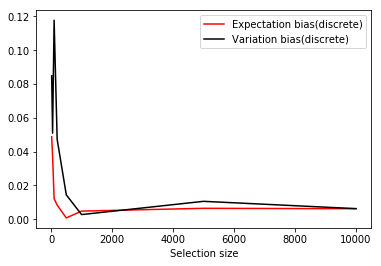

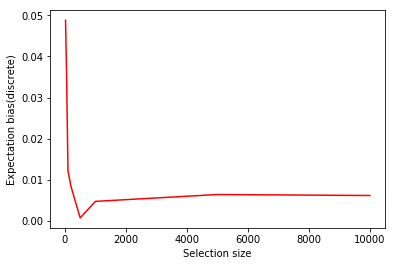

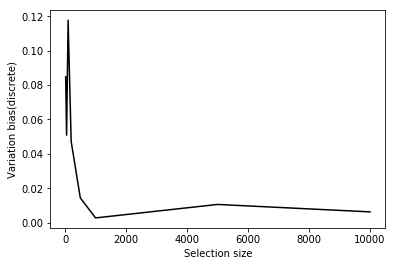

Maximum of expectation bias:  0.048810730519128764
Maximum of variation bias:  0.11774382484212385


In [37]:
from math import *
from scipy.stats import pareto
import numpy as np
import matplotlib.pyplot as plt

b = 5 #Наш коэффицент k
selection = pareto.rvs(b, size = 10000)
expectation, variation = pareto.stats (b, moments = 'mv')

selection_size = [20, 50, 100, 200, 500, 1000, 5000, 10000]
expectation_bias = []
variance_bias = []
for i in selection_size:
    expectation_bias.append (fabs (np.mean (selection[:i]) - expectation))
    variance_bias.append (fabs (np.var(selection[:i], ddof = 1) - variation))
    
expectation_bias_continious = []
variance_bias_continious = []
for i in range(10000):
    expectation_bias_continious.append (fabs (np.mean (selection[:i]) - expectation))
    variance_bias_continious.append (fabs (np.var(selection[:i], ddof = 1) - variation))
    
plt.plot(range(10000), expectation_bias_continious, label = 'Expectation bias', color = 'red')
plt.plot(range(10000), variance_bias_continious, label = 'Variation bias', color = 'black')
plt.xlabel('Selection size')
plt.legend(loc = 0)
plt.show()

plt.plot(range(10000), expectation_bias_continious, color = 'red')
plt.ylabel('Expectation bias')
plt.xlabel('Selection size')
plt.show()


plt.plot(range(10000), variance_bias_continious, color = 'black')
plt.ylabel('Variation bias')
plt.xlabel('Selection size')
plt.show()
    
plt.plot(selection_size, expectation_bias, label = 'Expectation bias(discrete)', color = 'red')
plt.plot(selection_size, variance_bias, label = 'Variation bias(discrete)', color = 'black')
plt.xlabel('Selection size')
plt.legend(loc = 0)
plt.show()

plt.plot(selection_size, expectation_bias, color = 'red')
plt.ylabel('Expectation bias(discrete)')
plt.xlabel('Selection size')
plt.show()


plt.plot(selection_size, variance_bias, color = 'black')
plt.ylabel('Variation bias(discrete)')
plt.xlabel('Selection size')
plt.show()
    
print('Maximum of expectation bias: ', max(expectation_bias))
print('Maximum of variation bias: ', max(variance_bias))

Как можно заметить оценка для математического ожидания сходится быстрее (на самом деле при увеличении числа выборки это проверить легче, но компьютер не справляется. Проверял на $10^8$ с помощью colab.research.google.com)<br>

Пусть задана случайная величина $X$, такая что $\mathbb E|X|^3 < \infty$. 
Пусть $\mu_4$ обозначает третий центральный момент: $\mu_4 = \mathbb E[(X - \mathbb E X)^4]$, 
а $\sigma = \sqrt{D[X]}$ — стандартное отклонение $X$. 
Тогда коэффициент эксцесса задаётся формулой: $\displaystyle\gamma_2 = \frac{\mu_4}{\sigma^4} - 3$ <br>
Построим оценку: 
$$
\displaystyle\hat\gamma_2 = 
    \frac
        {\overline{X^4} - 4\,\overline{X^3}\,\overline{X} + 6\,\overline{X^2}\,(\overline X)^2 - 3 (\overline X)^4}
        {\left(\frac1{n}\sum\limits_{i=1}^{n}(X_i-\overline X)^2\right)^2} - 3
    =
    \frac
        {\frac{\sum\limits_{i=1}^{n}X_i^4}{n}
        - 4\,\frac{\sum\limits_{i=1}^{n}X_i^3 \, \sum\limits_{i=1}^{n}X_i}{n^2}
        + 6\,\frac{\sum\limits_{i=1}^{n}X_i^2 \,\Big({\sum\limits_{i=1}^{n}X_i}\Big)^2 }{n^3}
        - 3\,\frac{\Big(\sum\limits_{i=1}^{n}X_i\Big)^4}{n^4}}
        {\left(\frac1{n}\sum\limits_{i=1}^{n}\Big(X_i - \frac{\sum\limits_{i=1}^{n}X_i}{n}\Big)^2\right)^2} - 3
$$ <br>

Известно, что 
$$
\overline{X} = \frac1{n}\sum\limits_{i=1}^{n}X_i \xrightarrow{\mathbb{P}} \mathbb{E}X_i \qquad 
\overline{X^2} = \frac1{n}\sum\limits_{i=1}^{n}X_i^2 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^2 \qquad 
\overline{X^3} = \frac1{n}\sum\limits_{i=1}^{n}X_i^3 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^3 \qquad 
\overline{X^4} = \frac1{n}\sum\limits_{i=1}^{n}X_i^4 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^4 
$$<br>
$$
H(u_1, u_2, u_3, u_4) = \frac
    {u_4 - 4 u_3 u_1 + 6 u_2 u_1^2 - 3 u_1^4}
    {u_2 - u_1^2} - 3
$$<br>

$H(u_1, u_2, u_3, u_4)$ - непрерывная функция $\Rightarrow$ по теореме о наследовании сходимости 

$$
    H\;( \overline{X}, \overline{X^2}, \overline{X^3}, \overline{X^4} ) =
    H\;\Bigg(
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i, \;
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i^2,\; 
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i^3,\;
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i^4
    \Bigg)
    \xrightarrow{\mathbb{P}} \gamma_2
$$


Определение равномерной сходимости: 
$$
\displaystyle \forall\varepsilon<0 \;
\exists\delta > 0, \;
\exists N = N\,(\varepsilon): \;
\forall n > N,\,\forall\omega \in \Omega \;
|X_n(\omega)-X(\omega)| < \delta 
\Rightarrow \mathbb{P}\,(|X_n(\omega)-X(\omega)|)< \frac{\varepsilon}2
$$
Она включает сходимость по множеству меры нуль. А такого может не быть при сходимости по вероятности.
